In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Enabling R
%reload_ext rpy2.ipython

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [3]:
dfOri = pd.read_csv("tmp/RR.csv", low_memory=False)

In [4]:
df1 = dfOri.copy()
# Dataframe slices for data exploration
dfDeath = df1[df1['status'] == 1]
dfAlive = df1[df1['status'] == 0]

print("\n-- Final Dataset --")
print("Neonatal deaths: ",dfDeath.shape[0])
print("Survivors: ",dfAlive.shape[0])

# Export to CSV 3 sets os data
df1.describe()


-- Final Dataset --
Neonatal deaths:  559
Survivors:  95515


,Unnamed: 0,ano,ini,fim,tempo,status,idade,estado_civil,escolaridade,raca_cor,sexo,parto,gestacoes,consultas_prenatal,assistencia_nasc,preenchimento_dnv
count,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,96074.000000,53427.000000,43234.000000,37189.000000,28011.000000
mean,48036.500000,2011.169515,2069.777578,2098.635885,28.858307,0.005818,24.531018,2.069852,3.662937,3.731322,1.484731,1.349491,1.773373,6.133228,1.143564,3.590018
std,27734.319218,3.144071,1151.368560,1151.371802,1.918185,0.076057,6.416853,1.497694,0.949331,1.172432,0.499769,0.476812,2.028085,2.687653,0.613930,1.501347
min,0.000000,2006.000000,0.000000,4.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,24018.250000,2008.000000,1078.000000,1107.000000,29.000000,0.000000,19.000000,1.000000,3.000000,4.000000,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000
50%,48036.500000,2011.000000,2110.000000,2139.000000,29.000000,0.000000,24.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,6.000000,1.000000,5.000000
75%,72054.750000,2014.000000,3081.000000,3110.000000,29.000000,0.000000,29.000000,2.000000,4.000000,4.000000,2.000000,2.000000,3.000000,8.000000,1.000000,5.000000
max,96073.000000,2016.000000,3986.000000,4015.000000,29.000000,1.000000,50.000000,5.000000,5.000000,5.000000,2.000000,2.000000,18.000000,20.000000,4.000000,5.000000


### Construindo tabela de sobrevivencia

In [6]:
dfAux = df1[['tempo']].copy()
dfAux.sort_values('tempo', inplace=True)
dfAux.reset_index(inplace=True)
dfAux.drop('index', axis=1, inplace=True)

myTable = pd.DataFrame(dfAux['tempo'].value_counts())

total = myTable.tempo.sum()

myTable['Risco'] = total

colNames = ['Evento acumulado',
            'Intervalo',
            'Amplitude do intervalo',
            'Função de densidade',
            'Densidade acumulada',
            'Sobrevida',
            'Função de Risco',
            'Função de Risco Acumulado']

for col in colNames:
    myTable[col] = 0

myTable.sort_index(inplace=True)
myTable.reset_index(inplace=True)
myTable.rename(columns={'tempo':'Eventos', 'index':'Tempo'}, inplace=True)

firstRow = myTable.head(1).copy()
firstRow['Eventos'] = 0
myTable = firstRow.append(myTable)
myTable.reset_index(inplace=True)
myTable.drop('index', axis=1, inplace=True)

myTable['Risco'].iloc[1] = myTable['Risco'].iloc[0]
for ind, row in myTable[2:].iterrows():
    myTable['Risco'].iloc[ind] = myTable['Risco'].iloc[ind-1] -  myTable['Eventos'].iloc[ind]
    
myTable

,Tempo,Eventos,Risco,Evento acumulado,Intervalo,Amplitude do intervalo,Função de densidade,Densidade acumulada,Sobrevida,Função de Risco,Função de Risco Acumulado
0,0,0,96074,0,0,0,0,0,0,0,0
1,0,163,96074,0,0,0,0,0,0,0,0
2,1,90,95984,0,0,0,0,0,0,0,0
3,2,61,95923,0,0,0,0,0,0,0,0
4,3,47,95876,0,0,0,0,0,0,0,0
5,4,29,95847,0,0,0,0,0,0,0,0
6,5,27,95820,0,0,0,0,0,0,0,0
7,6,15,95805,0,0,0,0,0,0,0,0
8,7,14,95791,0,0,0,0,0,0,0,0
9,8,9,95782,0,0,0,0,0,0,0,0


In [27]:
df = myTable.copy()

for i in range(1,df.shape[0]-1):
  df.loc[i,'Evento acumulado'] = df.loc[i,'Eventos'] + df.loc[i-1,'Evento acumulado']
  df.loc[i,'Intervalo'] = str('%s:%s' % (str(df.loc[(i),'Tempo']), str(df.loc[(i+1),'Tempo'])))
  df.loc[i,'Amplitude do intervalo'] = df.loc[i+1,'Tempo'] - df.loc[(i),'Tempo']
  df.loc[i,'Função de densidade'] = df.loc[i,'Eventos'] / (df.loc[0,'Risco'] * df.loc[i,'Amplitude do intervalo'])
  df.loc[i,'Densidade acumulada'] = df.loc[i-1, 'Densidade acumulada'] + (df.loc[i-1, 'Amplitude do intervalo'] * df.loc[i-1,'Função de densidade'])
  df.loc[i,'Sobrevida'] = 1 - df.loc[i,'Densidade acumulada']
  df.loc[i,'Função de Risco'] = df.loc[i,'Função de densidade'] / df.loc[i,'Sobrevida'] 
  df.loc[i,'Função de Risco Acumulado'] = -np.log(df.loc[i,'Sobrevida'])

colNames = {'Tempo':'t',
            'Risco':'R(t)',
            'Eventos':'N(t)',
            'Evento acumulado':'\u03A3 N(t)',
            'Intervalo':'x',
            'Amplitude do intervalo':'\u0394\u2093(t)',
            'Função de densidade':'f\u0302\u2093(t)',
            'Densidade acumulada':'F\u2093(t)',
            'Sobrevida':'S\u2093(t)',
            'Função de Risco':'\u03BB\u2093(t)',
            'Função de Risco Acumulado':'\u039B\u2093(t)'
}

df.rename(columns=colNames, inplace=True)
df.round(5).to_csv("table/tabela_sobrevivencia.csv")
df

,t,N(t),R(t),Σ N(t),x,Δₓ(t),f̂ₓ(t),Fₓ(t),Sₓ(t),λₓ(t),Λₓ(t)
0,0,0,96074,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,163,96074,163,0:1,1,0.001697,0.000000,1.000000,0.001697,-0.000000
2,1,90,95984,253,1:2,1,0.000937,0.001697,0.998303,0.000938,0.001698
3,2,61,95923,314,2:3,1,0.000635,0.002633,0.997367,0.000637,0.002637
4,3,47,95876,361,3:4,1,0.000489,0.003268,0.996732,0.000491,0.003274
5,4,29,95847,390,4:5,1,0.000302,0.003758,0.996242,0.000303,0.003765
6,5,27,95820,417,5:6,1,0.000281,0.004059,0.995941,0.000282,0.004068
7,6,15,95805,432,6:7,1,0.000156,0.004340,0.995660,0.000157,0.004350
8,7,14,95791,446,7:8,1,0.000146,0.004497,0.995503,0.000146,0.004507
9,8,9,95782,455,8:9,1,0.000094,0.004642,0.995358,0.000094,0.004653


In [7]:
### Função de Densidade

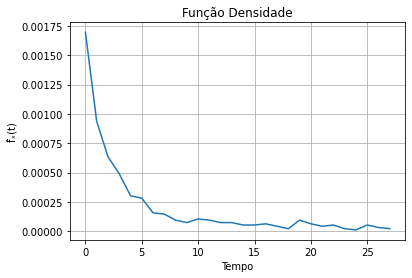

In [8]:
fig, ax = plt.subplots()

x = df['t'][1:29]
y = df['f̂ₓ(t)'][1:29]

ax.plot(x, y)
ax.set(xlabel='Tempo', ylabel='f̂ₓ(t)', title='Função Densidade')
ax.grid()

plt.savefig("img/funcao_densidade.png", dpi=300, bbox_inches='tight',pad_inches=0.5)
plt.show()

### Função de Risco

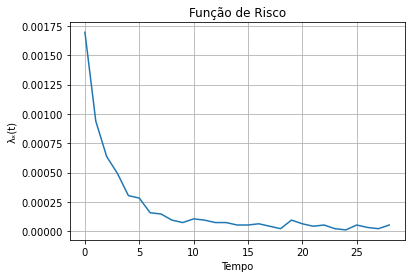

In [9]:
fig, ax = plt.subplots()
    
x = df['t'][1:30]
y = df['λₓ(t)'][1:30]

ax.plot(x, y)
ax.set(xlabel='Tempo', ylabel='λₓ(t)', title='Função de Risco')
ax.grid()

plt.savefig("img/funcao_risco.png", dpi=300, bbox_inches='tight',pad_inches=0.5)
plt.show()

### Função Densidade Acumulada

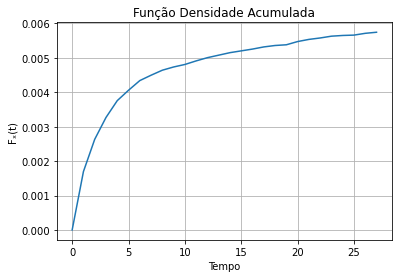

In [10]:
fig, ax = plt.subplots()
    
x = df['t'][1:29]
y = df['Fₓ(t)'][1:29]

ax.plot(x, y)
ax.set(xlabel='Tempo', ylabel='Fₓ(t)', title='Função Densidade Acumulada')
ax.grid()

plt.savefig("img/funcao_densidade_acumulada.png", dpi=300, bbox_inches='tight',pad_inches=0.5)
plt.show()

### Função de Sobrevida

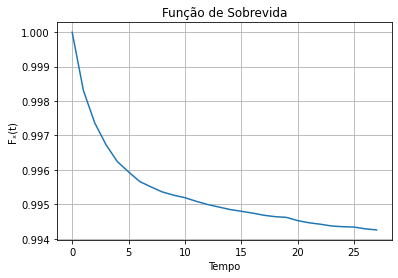

In [11]:
fig, ax = plt.subplots()
    
x = df['t'][1:29]
y = df['Sₓ(t)'][1:29]

ax.plot(x, y)

ax.set(xlabel='Tempo', ylabel='Fₓ(t)', title='Função de Sobrevida')

ax.grid()
plt.savefig("img/funcao_sobrevida.png", dpi=300, bbox_inches='tight',pad_inches=0.5)
plt.show()

### Função de Risco Acumulado

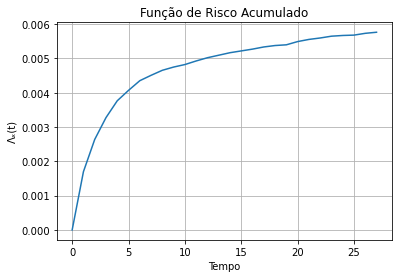

In [25]:
fig, ax = plt.subplots()
    
x = df['t'][1:29]
y = df['Λₓ(t)'][1:29]

ax.plot(x, y)
ax.set(xlabel='Tempo', ylabel='Λₓ(t)', title='Função de Risco Acumulado')

ax.grid()
plt.savefig("img/funcao_risco_acumulado.png", dpi=300, bbox_inches='tight',pad_inches=0.5)

plt.show()